In [1]:
import numpy as np
import os

from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure, FilledBands
from blg_strain.utils.utils import print_time
from blg_strain.utils.saver import Saver

# Fixed strain: 1% applied along zigzag axis

In [2]:
path = r'E:\sBLG_data\2020-08-10'

In [3]:
eps = 0.01
theta = 0
sl = StrainedLattice(0.01, 0)
sl.calculate()
sl.save(path)

## 2D map of ME coef versus $\Delta$, $E_F$

In [16]:
Deltas = np.linspace(-0.05, 0.05, 41)
EFs = np.linspace(-0.05, 0.05, 61)
ns = np.empty((len(Deltas), len(EFs), 2))
alphas = np.empty((len(Deltas), len(EFs), 2))
Ds = np.empty((len(Deltas), len(EFs), 2))

In [ ]:
for i, Delta in enumerate(Deltas):
    print_time({'Delta': Delta})
    bs = BandStructure(sl, Delta=Delta)
    Nx = 1000
    Ny = 1000
    bs.calculate(Nx, Ny)
    bs.save()
    
    for j, EF in enumerate(EFs):
        fb = FilledBands(bs, EF=EF, T=0)
        fb.calculate()
        fb.save()
        
        ns[i,j] = fb.n
        Ds[i,j] = fb.D
        alphas[i,j] = fb.alpha

In [25]:
# Save summary
s = Saver()
s.EFs = EFs
s.Deltas = Deltas
s.ns = ns
s.Ds = Ds
s.alphas = alphas
s.save(os.path.splitext(sl.filename)[0] + '\summary.h5')

In [26]:
s = Saver.load(os.path.splitext(sl.filename)[0] + '\summary.h5')

# We need a denser grid, |EF| and |Delta| closer to zero
started running on lab computer

# Focus near zero

In [4]:
Deltas = np.linspace(-0.01, 0.01, 41)
EFs = np.linspace(-0.005, 0.005, 61)
ns = np.empty((len(Deltas), len(EFs), 2))
alphas = np.empty((len(Deltas), len(EFs), 2))
Ds = np.empty((len(Deltas), len(EFs), 2))

In [5]:
for i, Delta in enumerate(Deltas):
    print_time({'Delta': Delta})
    bs = BandStructure(sl, Delta=Delta)
    Nx = 200
    Ny = 200
    bs.calculate(Nx, Ny)
    bs.save()
    
    for j, EF in enumerate(EFs):
        fb = FilledBands(bs, EF=EF, T=0)
        fb.calculate()
        fb.save()
        
        ns[i,j] = fb.n
        Ds[i,j] = fb.D
        alphas[i,j] = fb.alpha

2020-08-10 14:46:04	Delta: -0.01
2020-08-10 14:46:09	Delta: -0.0095
2020-08-10 14:46:15	Delta: -0.009000000000000001
2020-08-10 14:46:20	Delta: -0.0085
2020-08-10 14:46:34	Delta: -0.008
2020-08-10 14:46:44	Delta: -0.0075
2020-08-10 14:46:49	Delta: -0.007
2020-08-10 14:46:55	Delta: -0.006500000000000001
2020-08-10 14:47:02	Delta: -0.006
2020-08-10 14:47:08	Delta: -0.0055
2020-08-10 14:47:14	Delta: -0.005
2020-08-10 14:47:20	Delta: -0.0045000000000000005
2020-08-10 14:47:26	Delta: -0.004
2020-08-10 14:47:31	Delta: -0.0034999999999999996
2020-08-10 14:47:37	Delta: -0.003
2020-08-10 14:47:43	Delta: -0.0025000000000000005
2020-08-10 14:47:49	Delta: -0.002
2020-08-10 14:47:56	Delta: -0.0014999999999999996
2020-08-10 14:48:02	Delta: -0.0009999999999999992
2020-08-10 14:48:08	Delta: -0.0005000000000000004
2020-08-10 14:48:15	Delta: 0.0
2020-08-10 14:48:22	Delta: 0.0005000000000000004
2020-08-10 14:48:28	Delta: 0.0009999999999999992
2020-08-10 14:48:35	Delta: 0.0014999999999999996
2020-08-10 14

In [6]:
# Save summary
s = Saver()
s.EFs = EFs
s.Deltas = Deltas
s.ns = ns
s.Ds = Ds
s.alphas = alphas
s.save(os.path.splitext(sl.filename)[0] + '\summary.h5')

# The above was probably too coarse with 200x200 - let's fix Delta and sweep EF

In [8]:
Deltas = np.linspace(-0.01, 0.01, 41)
EFs = np.linspace(-0.005, 0.005, 61)
ns = np.empty((len(EFs), 2))
alphas = np.empty((len(EFs), 2))
Ds = np.empty((len(EFs), 2))

In [26]:
Delta = 0.005
bs = BandStructure(sl, Delta=Delta)
Nx = 1000
Ny = 1000
bs.calculate(Nx, Ny)
bs.save()

for j, EF in enumerate(EFs):
    fb = FilledBands(bs, EF=EF, T=0)
    fb.calculate()

    ns[j] = fb.n
    Ds[j] = fb.D
    alphas[j] = fb.alpha

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


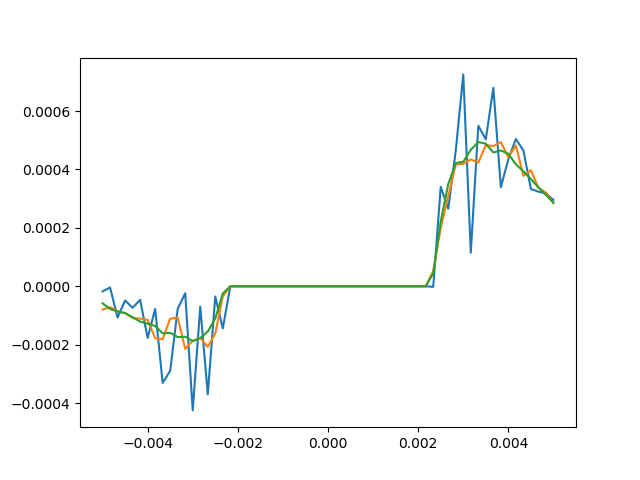

In [22]:
fig, ax = plt.subplots()

In [27]:
ax.plot(EFs, alphas[:,0])